In [1]:
import sys
sys.path.append('../pyclk')
from pyclk import Module, Sig, In, Out, Reg, Trace

In [2]:
class counter(Module):
    def __init__(self):
        with self.setup():
            self.i_rst = In()
            self.o_cnt = Out()
            self.r_cnt = Reg()
    def logic(self):
        # logic goes here:
        if self.i_rst == 1:
            self.r_cnt = 0
        else:
            self.r_cnt = self.r_cnt.q + 1
        self.o_cnt = self.r_cnt.q

class toplevel(Module):
    def __init__(self):
        with self.setup():
            # declare signals, registers, I/Os:
            self.i_rst1 = In()
            self.i_rst2 = In()
            self.o_cnt1 = Out()
            self.o_cnt2 = Out()
            # instanciate sub-modules and make connections:
            self.u_counter1 = _ = counter()
            _.i_rst(self.i_rst1)
            _.o_cnt(self.o_cnt1)
            self.u_counter2 = _ = counter()
            _.i_rst(self.i_rst2)
            _.o_cnt(self.o_cnt2)
    def task(self): # a task can be hooked to the module
        while True:
            yield self.wait(2) # wait for 2 clock cycles
            print(f'Time is {self.time}')

In [3]:
u_toplevel = toplevel()

trace = Trace()
trace.add(u_toplevel.i_rst1)
trace.add(u_toplevel.o_cnt1)
trace.add(u_toplevel.i_rst2)
trace.add(u_toplevel.o_cnt2)

u_toplevel.i_rst1 = 1
u_toplevel.i_rst2 = 1

u_toplevel.run(3, trace=trace)

u_toplevel.i_rst1 = 0

u_toplevel.run(trace=trace)

u_toplevel.i_rst2 = 0

u_toplevel.run(5, trace=trace)

trace.remove(u_toplevel.o_cnt1)

u_toplevel.run(5, trace=trace)

trace.add(u_toplevel.o_cnt1)

u_toplevel.run(5, trace=trace)

Time is 2
Time is 4
Time is 6
Time is 8
Time is 10
Time is 12
Time is 14
Time is 16
Time is 18


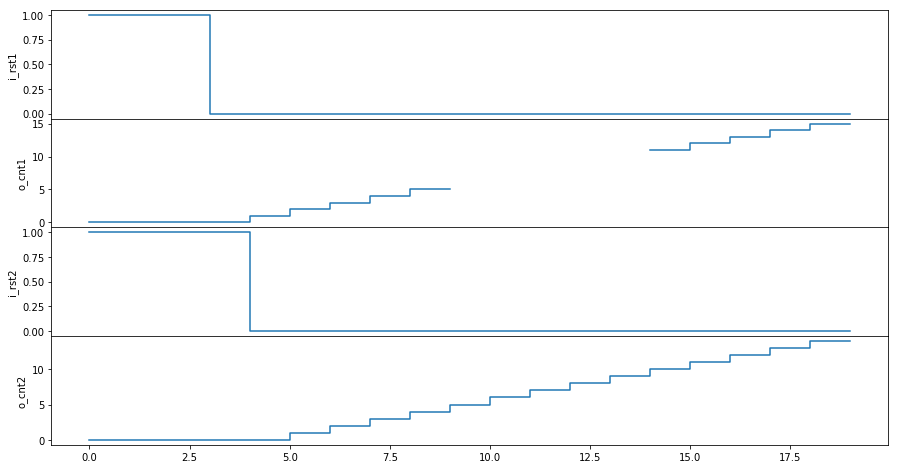

In [4]:
trace.plot()